# Proyek Analisis Data: Bike Sharing Data
- **Nama:** Aan Alma Khanafi
- **Email:** aanalma03@gmail.com
- **ID Dicoding:** aan_alma

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dapat memengaruhi jumlah penyewa sepeda ?
- Bagaimana kondisi penyewaan sepeda pada hari seperti workday, holiday, dan weekday ?
- Apakah penyewa casual dan registered memiliki perbedaan signifikan dalam hal jam penyewaan?
- Bagaimana tren jasa ini pada tahun 2011 dan 2012 ?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

pada tahap gathering data, kita akan mengumpulkan data dengan tema data yang dipilih yaitu Bike Sharing

In [63]:
# memuat data day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [64]:
# memuat data hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

pada tahap ini kita akan mengidentifikasi anomali yang ada pada dataset Bike Sharing

In [6]:
# mengecek tipe data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# mengecek apakah ada data yang missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
# mengecek apakah ada duplikasi data pada data day
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [10]:
# mengecek inaccurate pada data day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# mengecek tipe data hours
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
# mengecek apakah data ada yang missing value atau tidak di hours
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [13]:
# mengecek apakah ada duplikasi data pada hours
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


In [14]:
# mengecek apakah ada data yang inacurrate pada hours
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


berdasarkan accessing data pada dataset Bike Sharing terdapat beberapa anomali pada data

days: tipe data kolom dteday -> datetime
hours: tipe data kolom dteday -> datetime

### Cleaning Data

pada tahap ini kita akan melakukan pembersihan data yang meliputi penghapusan data yang tidak dibutuhkan dan memperbaiki anomali data yang sudah ditemukan

In [65]:
# hapus data day karena kita menggunakan data hours berdasarkan pertanyaan bisnis yang tertera
del day_df

In [66]:
# menghapus kolom yang tidak dibutuhkan di data hour karena tidak relevan dengan pertanyaan bisnis
drop_col = ['temp', 'atemp', 'hum','instant', 'windspeed']

for col in drop_col:
    for df_col in hour_df:
      if col == df_col:
        hour_df.drop(labels=col, axis=1, inplace=True)

hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


In [67]:
# mengubah nama dan value kolom agar mudah dibaca
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_workingday',
    'cnt': 'count'
}, inplace=True)

hour_df.head()

,dateday,season,year,month,hour,is_holiday,day_of_week,is_workingday,weathersit,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


In [68]:
hour_df['season'] = hour_df['season'].map({
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

hour_df['year'] = hour_df['year'].map({
    0: 2011,
    1: 2012
})

hour_df['month'] = hour_df['month'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

hour_df['day_of_week'] = hour_df['day_of_week'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

hour_df['is_holiday'] = hour_df['is_holiday'].map({
    0: 'no',
    1: 'yes'
})

hour_df['is_workingday'] = hour_df['is_workingday'].map({
    0: 'no',
    1: 'yes'
})

hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'clear',
    2: 'mist',
    3: 'light rain',
    4: 'heavy rain'
})

hour_df.head()

,dateday,season,year,month,hour,is_holiday,day_of_week,is_workingday,weathersit,casual,registered,count
0,2011-01-01,springer,2011,January,0,no,Saturday,no,clear,3,13,16
1,2011-01-01,springer,2011,January,1,no,Saturday,no,clear,8,32,40
2,2011-01-01,springer,2011,January,2,no,Saturday,no,clear,5,27,32
3,2011-01-01,springer,2011,January,3,no,Saturday,no,clear,3,10,13
4,2011-01-01,springer,2011,January,4,no,Saturday,no,clear,0,1,1


In [69]:
# mengubah tipe data pada setiap kolom
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])
hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['is_holiday'] = hour_df['is_holiday'].astype('category')
hour_df['day_of_week'] = hour_df['day_of_week'].astype('category')
hour_df['is_workingday'] = hour_df['is_workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [70]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dateday        17379 non-null  datetime64[ns]
 1   season         17379 non-null  category      
 2   year           17379 non-null  category      
 3   month          17379 non-null  category      
 4   hour           17379 non-null  int64         
 5   is_holiday     17379 non-null  category      
 6   day_of_week    17379 non-null  category      
 7   is_workingday  17379 non-null  category      
 8   weathersit     17379 non-null  category      
 9   casual         17379 non-null  int64         
 10  registered     17379 non-null  int64         
 11  count          17379 non-null  int64         
dtypes: category(7), datetime64[ns](1), int64(4)
memory usage: 799.3 KB


**Insight:**
- terdapat beberapa data yang tidak relevan dengan pertanyaan bisnis
- mengubah kolom dan value agar dapat mudah dimengerti

## Exploratory Data Analysis (EDA)

### Explorasi data dengan mengelompokkan data berdasarkan kolom tertentu

In [76]:
# mengelompokkan data berdasarkan cuaca
hour_df.groupby('weathersit').agg({
    'count': ['sum', 'min', 'max', 'mean']
})

<ipython-input-76-124b359e281e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('weathersit').agg({


count                     
                sum min  max        mean
weathersit                              
clear       2338173   1  977  204.869272
heavy rain      223  23  164   74.333333
light rain   158331   1  891  111.579281
mist         795952   1  957  175.165493

In [72]:
hour_df.groupby('year').agg({
    'count': ['sum', 'min', 'max', 'mean']
})

<ipython-input-72-97657f2f734d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('year').agg({


count                     
          sum min  max        mean
year                              
2011  1243103   1  651  143.794448
2012  2049576   1  977  234.666361

In [73]:
hour_df.groupby('month').agg({
    'count': ['sum', 'min', 'max', 'mean']
})

<ipython-input-73-fc15927e20d7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('month').agg({


count                     
              sum min  max        mean
month                                 
April      269094   1  822  187.260960
August     351194   1  941  238.097627
December   211036   1  759  142.303439
February   151352   1  610  112.865026
January    134933   1  559   94.424773
July       344948   1  913  231.819892
June       346342   1  900  240.515278
March      228920   1  957  155.410726
May        331686   1  873  222.907258
November   254831   1  729  177.335421
October    322352   1  963  222.158511
September  345991   1  977  240.773138

In [74]:
hour_df.groupby('is_holiday').agg({
    'count': ['sum', 'min', 'max', 'mean']
})

<ipython-input-74-686c2054cfba>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('is_holiday').agg({


count                    
                sum min  max       mean
is_holiday                             
no          3214244   1  977  190.42858
yes           78435   1  712  156.87000

In [77]:
hour_df.groupby('day_of_week').agg({
    'count': ['sum', 'min', 'max', 'mean']
})

<ipython-input-77-c0ef40504776>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('day_of_week').agg({


count                     
                sum min  max        mean
day_of_week                             
Friday       487790   1  957  196.135907
Monday       455503   1  968  183.744655
Saturday     477807   1  783  190.209793
Sunday       444027   1  776  177.468825
Thursday     485395   1  976  196.436665
Tuesday      469109   1  970  191.238891
Wednesday    473048   1  977  191.130505

In [78]:
hour_df.groupby('is_workingday').agg({
    'count': ['sum', 'min', 'max', 'mean']
})

<ipython-input-78-49d715a6842a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('is_workingday').agg({


count                     
                   sum min  max        mean
is_workingday                              
no             1000269   1  783  181.405332
yes            2292410   1  977  193.207754

In [80]:
hour_df.groupby('hour').agg({
    'registered': 'sum',
    'casual': 'sum',
    'count': ['sum', 'min', 'max', 'mean']
})

registered casual   count                     
            sum    sum     sum min  max        mean
hour                                               
0         31755   7375   39130   2  283   53.898072
1         19455   4709   24164   1  168   33.375691
2         12940   3412   16352   1  132   22.869930
3          6281   1893    8174   1   79   11.727403
4          3554    874    4428   1   28    6.352941
5         13249   1012   14261   1   66   19.889819
6         52115   3017   55132   1  213   76.044138
7        146134   8037  154171   1  596  212.064649
8        245240  15761  261001   5  839  359.011004
9        136980  22458  159438  14  426  219.309491
10        92468  33789  126257   8  539  173.668501
11       108034  43286  151320  10  663  208.143054
12       134696  49718  184414   3  776  253.315934
13       132206  52713  184919  11  760  253.661180
14       120563  55089  175652  12  750  240.949246
15       128543  54606  183149   7  750  251.233196
16       173914  53834  227748  11  783  311.983562
17       282640  54220  336860  15  976  461.452055
18       265276  44496  309772  23  977  425.510989
19       191284  35505  226789  11  743  311.523352
20       138172  26378  164550  11  567  226.030220
21       104875  20570  125445   6  584  172.314560
22        79412  16200   95612   9  502  131.335165
23        52876  11065   63941   2  256   87.831044

**Insight:**
- jumlah penyewa sepeda lebih banyak pada cuaca cerah
- pada tahun 2012 penyewa sepeda meningkat 2x lipat daripada tahun 2011
- kebanyakan penyewa sepeda registered menyewa dengan durasi 17 jam, sedangkan penyewa sepeda casual menyewa dengan durasi 14 jam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca dapat memengaruhi jumlah penyewa sepeda

<ipython-input-84-86b2c237b6ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

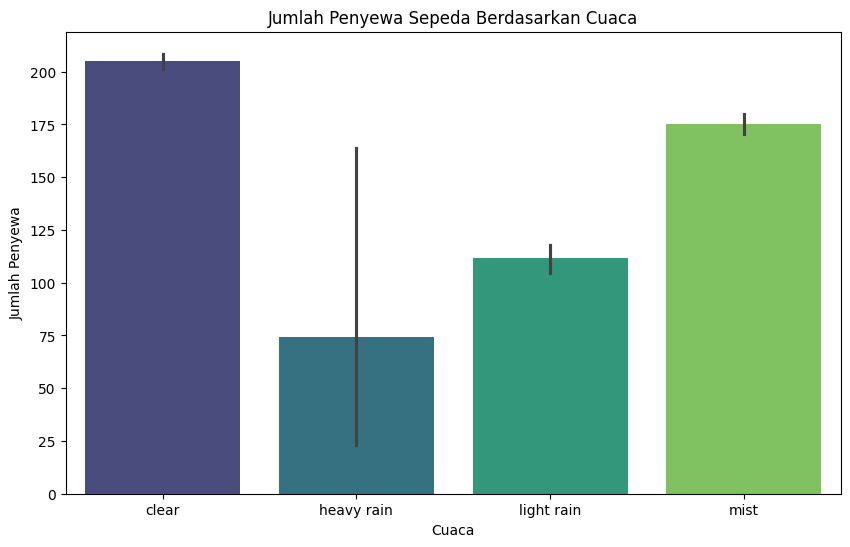

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='weathersit',
    y='count',
    data=hour_df,
    palette='viridis'
)
plt.title('Jumlah Penyewa Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewa')
plt.show()

### Pertanyaan 2: Bagaimana nilai penyewaan pada hari seperti workday, holiday, dan weekday ?

<ipython-input-90-c32ae89464d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-90-c32ae89464d5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

Text(0.5, 1.0, 'Jumlah pengguna sepeda')

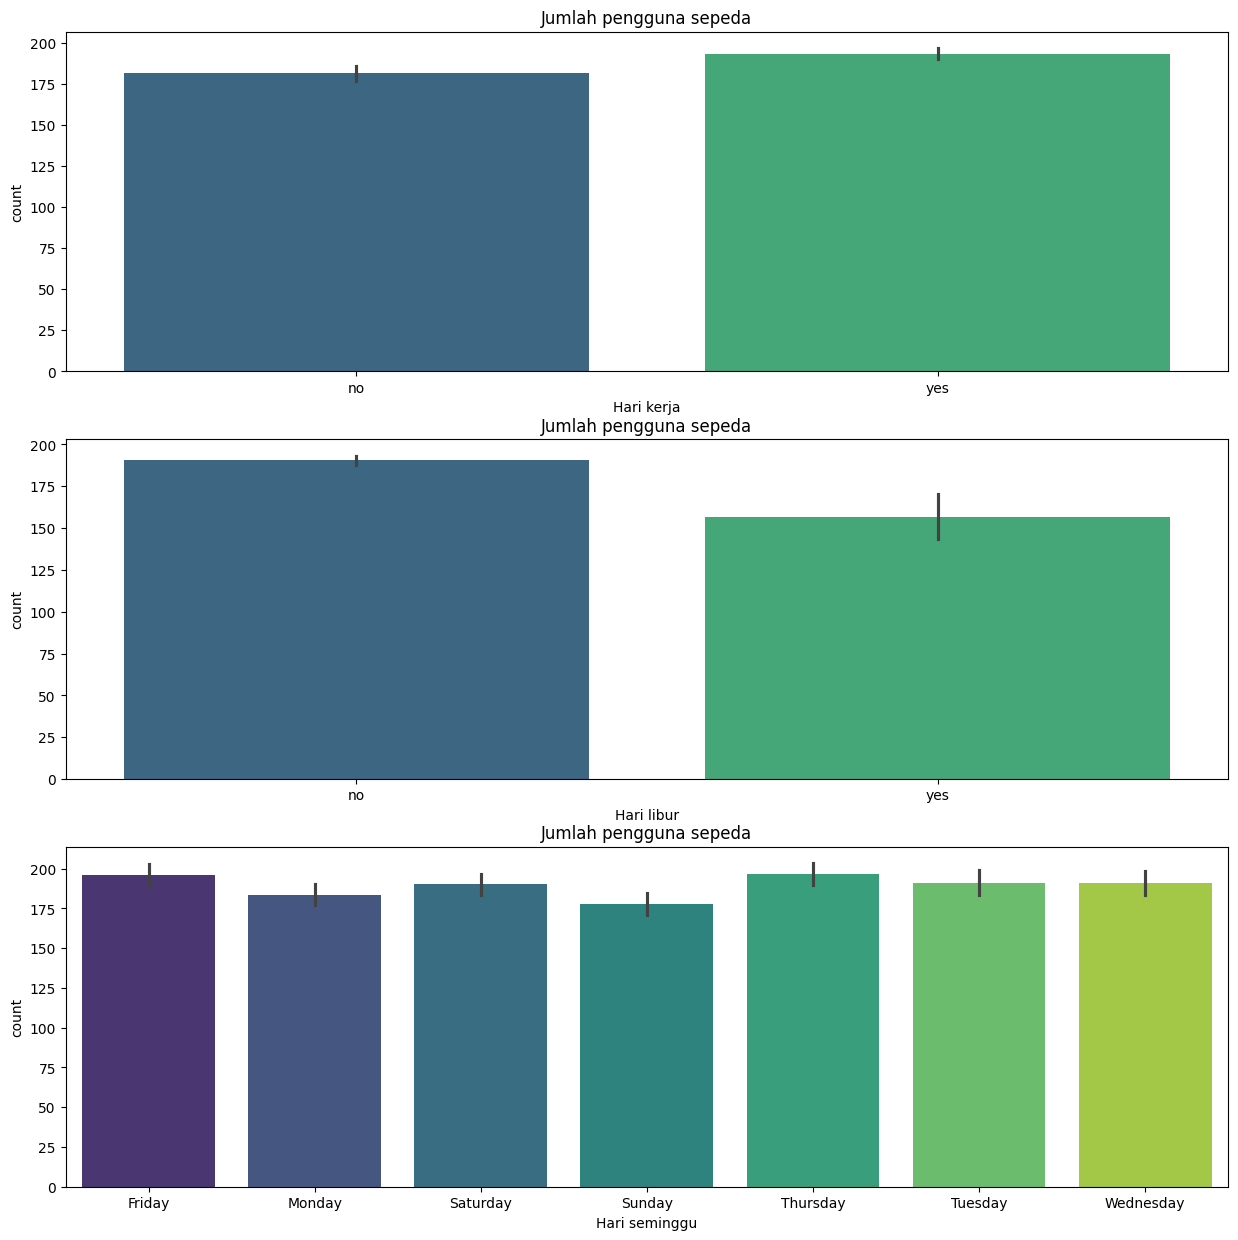

In [90]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

sns.barplot(
    x="is_workingday",
    y="count",
    data=hour_df,
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title("Jumlah data pengguna sepeda pada hari kerja")
axes[0].set_xlabel("Hari kerja")
axes[0].set_title("Jumlah pengguna sepeda")

sns.barplot(
    x="is_holiday",
    y="count",
    data=hour_df,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title("Jumlah data pengguna sepeda pada hari libur")
axes[1].set_xlabel("Hari libur")
axes[1].set_title("Jumlah pengguna sepeda")

sns.barplot(
    x="day_of_week",
    y="count",
    data=hour_df,
    palette='viridis',
    ax=axes[2]
)
axes[2].set_title("Jumlah data pengguna sepeda pada hari seminggu")
axes[2].set_xlabel("Hari seminggu")
axes[2].set_title("Jumlah pengguna sepeda")

### Pertanyaan 3: Berapa lama dalam jam penyewa baik casual maupun registered menggunakan jasa ini ?

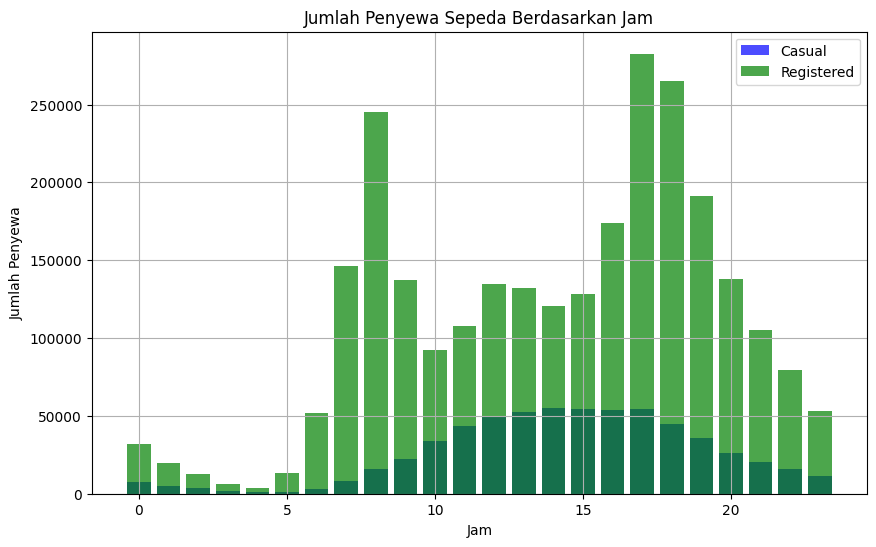

In [87]:
hours = hour_df.groupby('hour')[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    hours['hour'],
    hours['casual'],
    label='Casual',
    color='blue',
    alpha=0.7
)

plt.bar(
    hours['hour'],
    hours['registered'],
    label='Registered',
    color='green',
    alpha=0.7
)

plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')
plt.title('Jumlah Penyewa Sepeda Berdasarkan Jam')
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 4: Bagaimana tren jasa ini pada tahun 2011 dan 2012 ?

<ipython-input-93-f65e861610e4>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = hour_df.groupby(['year', 'month']).agg({


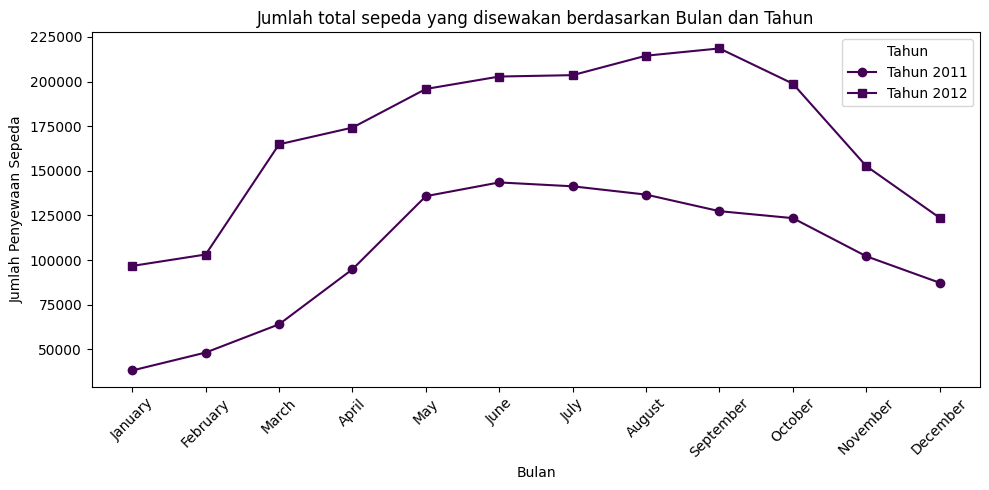

In [93]:
hour_df['month'] = pd.Categorical(hour_df['month'],
    categories=[
        'January', 'February', 'March', 'April', 'May',
        'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

monthly_counts = hour_df.groupby(['year', 'month']).agg({
    'count': 'sum'
}).reset_index()

years = monthly_counts['year'].unique()

colors = plt.cm.viridis(range(len(years)))
marker = ['o', 's', '^', 'D', 'V']

plt.figure(figsize=(10,5))
for i, year in enumerate(years):
  data_per_year = monthly_counts[monthly_counts['year'] == year]
  plt.plot(data_per_year['month'], data_per_year['count'], label='Tahun {}'.format(year), color=colors[i], marker=marker[i])


plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan Tahun")
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title="Tahun", loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Conclusion

- Berdasarkan pada grafik bar, dapat disimpulkan bahwa cuaca dapat memengaruhi penyewaan sepeda. pada grafik bar kebanyakan penyewa sepeda menyewa pada hari yang cerah.
- berdasarkan pada grafik bar, pada hari kerja dan hari libur, terdapat data yang sinkron yaitu kebanyakan orang menyewa sepeda pada hari kerja. sedangkan hari dalam satu minggu peningkatan pengguna sepeda dari hari ke hari tidak turun secara signifikan. Hal ini membuktikan bahwa kebutuhan akan menyewa sepeda untuk aktivitas keseharian masih sangat dibutuhkan.
- berdasarkan pada grafik bar, terdapat 2 tipe penyewa sepeda yaitu penyewa registered dan penyewa casual. Penyewa registered kebanyakan menyewa sepeda dalam satu hari mencapai 17 jam, sedangkan penyewa casual mencapai 14 jam. Dalam konteks pengurangan polusi udara, informasi ini menjadi kabar baik.
- berdasarkan pada grafik garis, dapat disimpulkan bahwa pada tahun 2012, kebutuhan akan penyewaan sepeda meningkat 2x lipat dari tahun sebelumnya.

In [94]:
hour_df.to_csv('hour_df.csv', index=False)